In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("Movies_final.csv")

In [52]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86493 entries, 0 to 86492
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    86493 non-null  int64  
 1   title                 86493 non-null  object 
 2   vote_average          86493 non-null  float64
 3   vote_count            86493 non-null  int64  
 4   status                86493 non-null  object 
 5   release_date          86427 non-null  object 
 6   revenue               86493 non-null  int64  
 7   runtime               86493 non-null  int64  
 8   adult                 86493 non-null  bool   
 9   backdrop_path         70442 non-null  object 
 10  budget                86493 non-null  int64  
 11  homepage              17774 non-null  object 
 12  imdb_id               86467 non-null  object 
 13  original_language     86493 non-null  object 
 14  original_title        86493 non-null  object 
 15  overview           

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,movieId,Directors,Cast,StarActors
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",79132,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",109487,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...","Matthew McConaughey, Anne Hathaway, Jessica Ch..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",58559,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Christian Bale, Heath Ledger, Aaron Eckhart"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",72998,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...","Sam Worthington, Zoe Saldaña, Sigourney Weaver"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",89745,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...","Robert Downey Jr., Chris Evans"


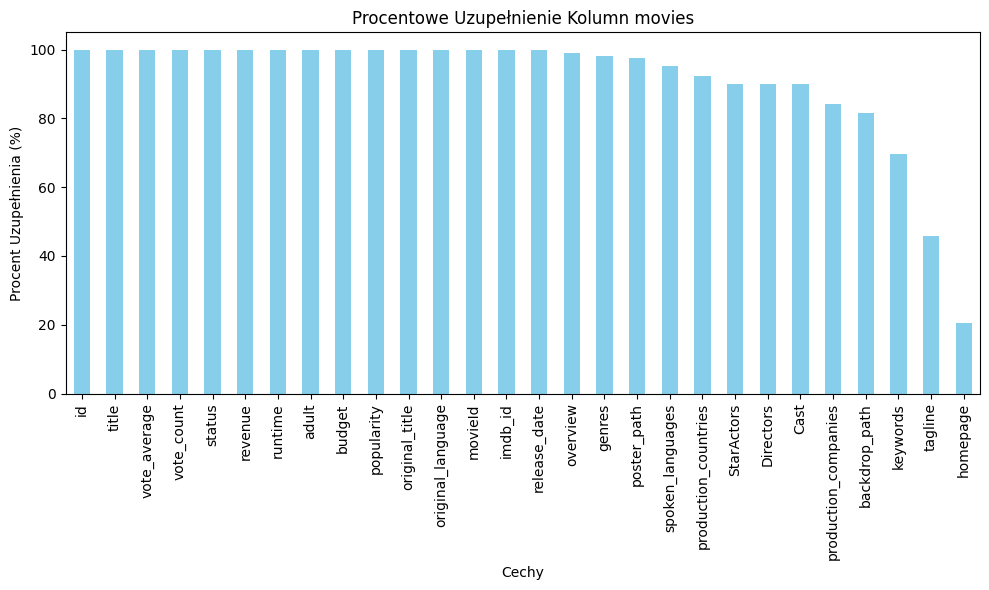

In [53]:
# Procentowe uzupełnienie danych Movies_final.csv

percentage_complete = df.notnull().mean() * 100

plt.figure(figsize=(10, 6))
percentage_complete.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Procentowe Uzupełnienie Kolumn movies')
plt.xlabel('Cechy')
plt.ylabel('Procent Uzupełnienia (%)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

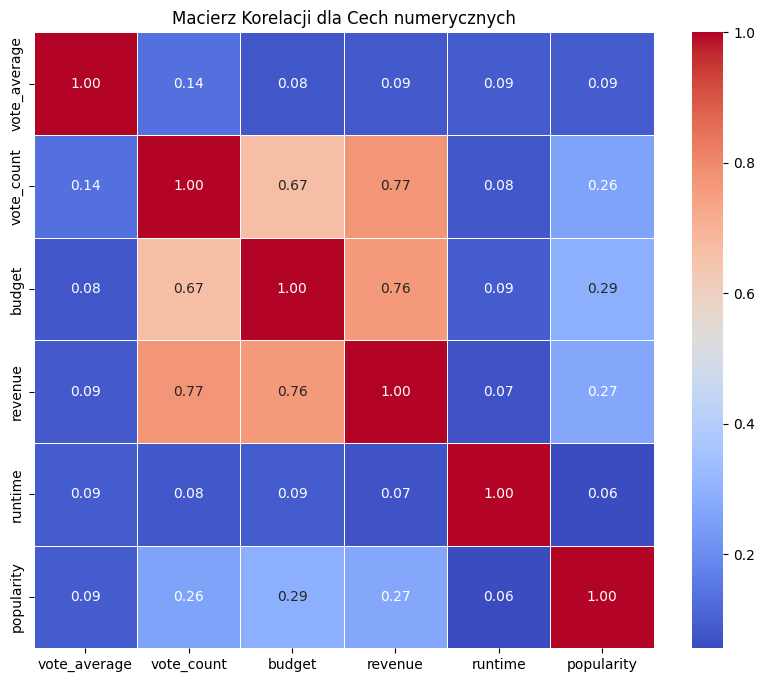

In [54]:
numeric_features = df[['vote_average','vote_count','budget', 'revenue', 'runtime', 'popularity']]
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz Korelacji dla Cech numerycznych')
plt.show()

In [55]:
df_basics = pd.read_csv(
    "title.basics.tsv.gz", 
    sep="\t", 
    dtype=str, 
    na_values="\\N", 
    usecols=["tconst", "titleType", "primaryTitle"]
)

In [56]:
df_name = pd.read_csv(
    "Basic_names_crew_dataset.gz",
    sep="\t",
    na_values="\\N",
    usecols=["nconst", "primaryName"]
)

In [57]:
df_crew = pd.read_csv(
    "Crew_dataset.gz",
    sep="\t",
    na_values="\\N",
    usecols=["tconst", "directors"]
)

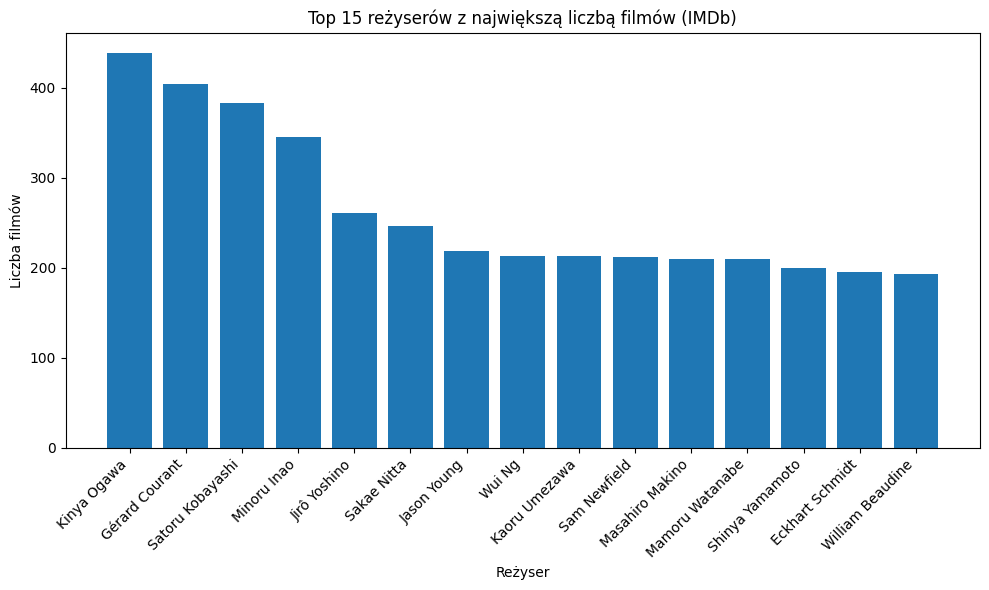

       nconst  title_count       primaryName
0   nm0644554          439       Kinya Ogawa
1   nm0183659          404    Gérard Courant
2   nm0462051          383  Satoru Kobayashi
3   nm0997109          345       Minoru Inao
4   nm1846347          261      Jirô Yoshino
5   nm0457554          246       Sakae Nitta
6   nm3248232          219       Jason Young
7   nm0628860          213            Wui Ng
8   nm0383255          213     Kaoru Umezawa
9   nm0627864          212      Sam Newfield
10  nm0538632          210   Masahiro Makino
11  nm0913835          210   Mamoru Watanabe
12  nm0945487          200   Shinya Yamamoto
13  nm0772905          195   Eckhart Schmidt
14  nm0064415          193  William Beaudine


In [58]:
# Tworzenie wstepnego wykresu dotyczacego Top15 rezyserow z najwieksza liczba filmow

df_crew = df_crew.dropna(subset=["directors"]).copy()
df_crew["directors"] = df_crew["directors"].str.split(",")
df_crew = df_crew.merge(df_basics, on="tconst", how="inner") 
df_crew = df_crew[df_crew["titleType"].isin(["movie","tvMovie"])].copy() # Potrzebujemy usunac seriale
df_crew = df_crew.explode("directors").rename(columns={"directors": "nconst"})

director_counts = df_crew.groupby("nconst")["tconst"].nunique()
director_counts = director_counts.sort_values(ascending=False)
top_n = director_counts.head(15)

df_top_directors = top_n.reset_index()  # zamiana series na DataFrame
df_top_directors.columns = ["nconst", "title_count"]
df_top_directors = df_top_directors.merge(df_name, on="nconst", how="left") # Imiona i nazwiska rezyserow

plt.figure(figsize=(10, 6))
plt.bar(df_top_directors["primaryName"], df_top_directors["title_count"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Reżyser")
plt.ylabel("Liczba filmów")
plt.title("Top 15 reżyserów z największą liczbą filmów (IMDb)")
plt.tight_layout()

plt.show()
print(df_top_directors)

In [59]:
from wordcloud import WordCloud

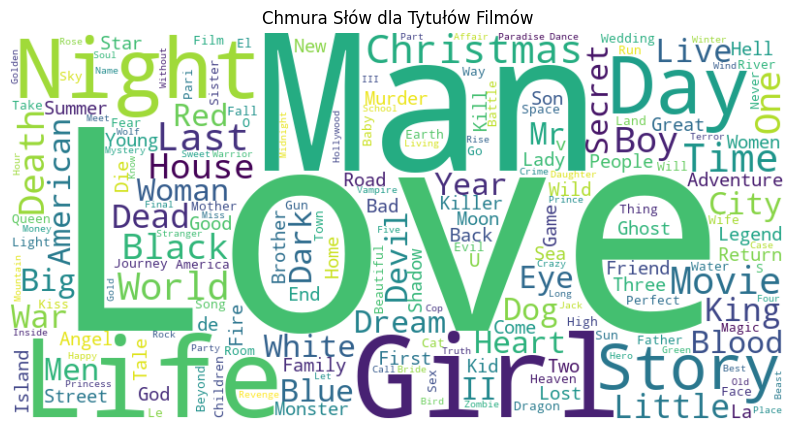

In [60]:
# Chmura słow dla title (w jezyku angielskim)

text = " ".join(title for title in df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura Słów dla Tytułów Filmów')
plt.show()


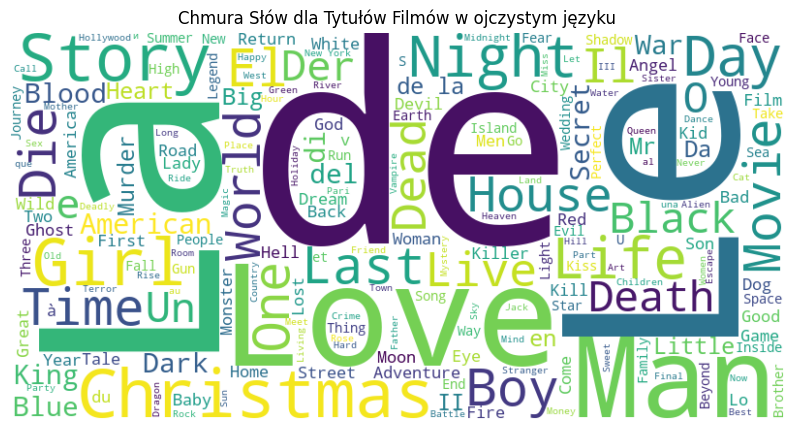

In [61]:
# Chmura słow dla title (tylko w orginalnym jezyku)

text = " ".join(title for title in df['original_title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura Słów dla Tytułów Filmów w ojczystym języku')
plt.show()

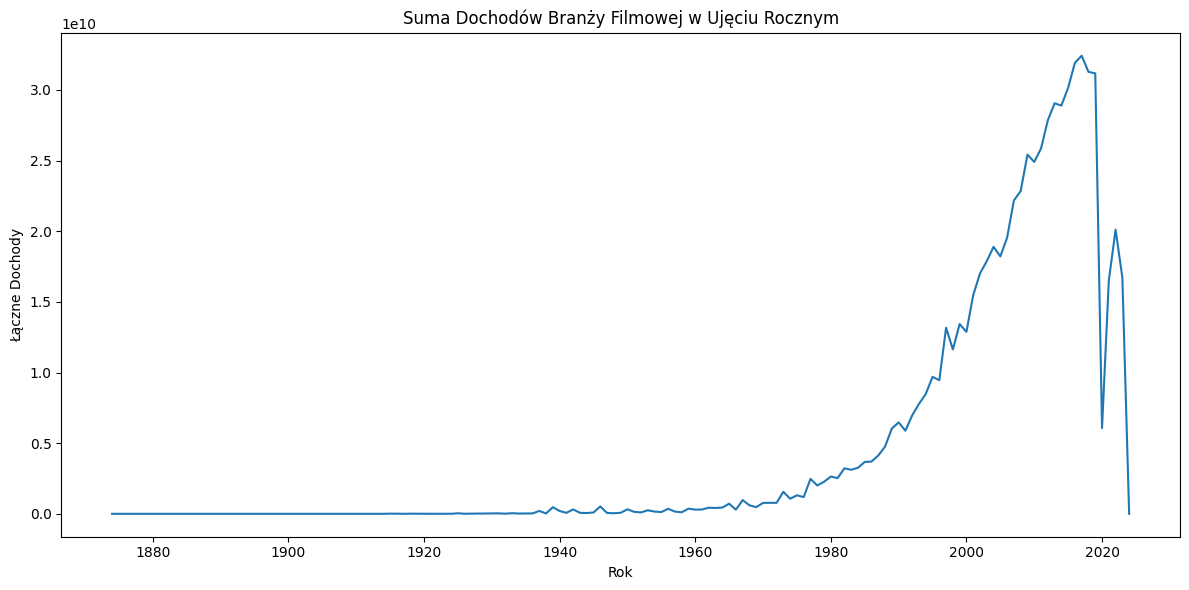

In [62]:
# Przychody z filmow rozdzielone na lata

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df = df.dropna(subset=['release_year'])

annual_revenue = df.groupby('release_year')['revenue'].sum()

plt.figure(figsize=(12, 6))
annual_revenue.plot(kind='line')
plt.title('Suma Dochodów Branży Filmowej w Ujęciu Rocznym')
plt.xlabel('Rok')
plt.ylabel('Łączne Dochody')
plt.tight_layout()
plt.show()

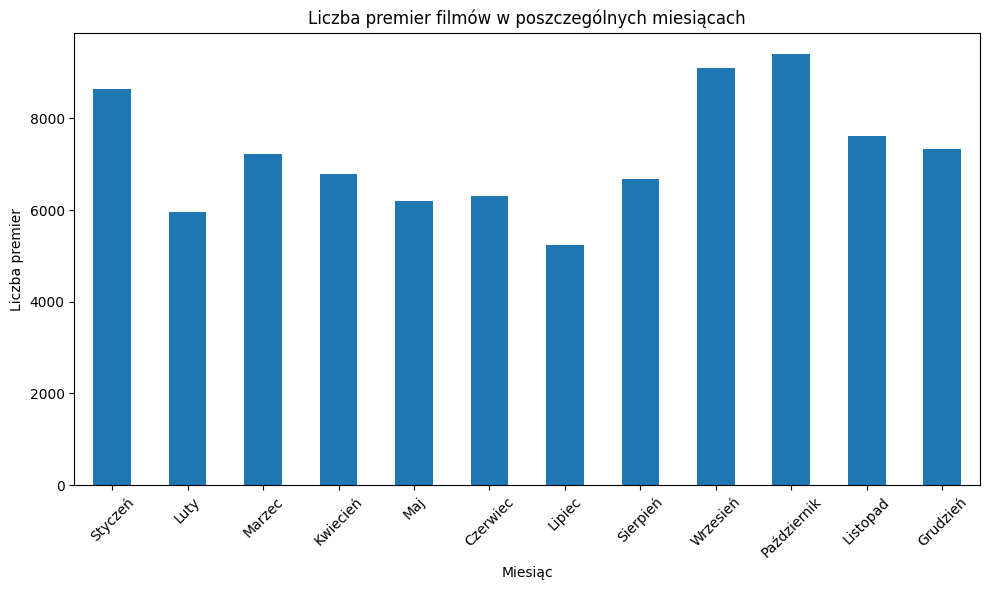

In [63]:
# Premiery filmów rozdzielone na miesiące

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_month'] = df['release_date'].dt.month
df = df.dropna(subset=['release_month'])

monthly_counts = df['release_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Liczba premier filmów w poszczególnych miesiącach')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba premier')

plt.xticks(range(12), 
           ['Styczeń','Luty','Marzec','Kwiecień','Maj','Czerwiec',
            'Lipiec','Sierpień','Wrzesień','Październik','Listopad','Grudzień'], 
           rotation=45)

plt.tight_layout()
plt.show()

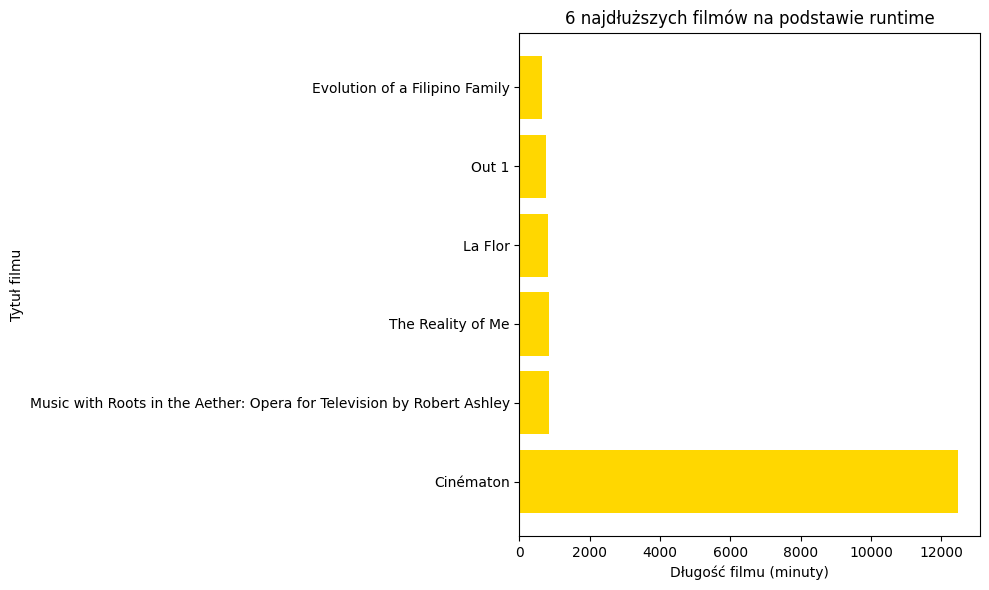

                                                   title  runtime
66246                                          Cinématon    12480
79741  Music with Roots in the Aether: Opera for Tele...      840
68711                                  The Reality of Me      840
39958                                            La Flor      803
26215                                              Out 1      743
38127                     Evolution of a Filipino Family      647


In [64]:
# Top 6 najdluzszych filmow opartych na runtime

df["runtime"] = pd.to_numeric(df["runtime"], errors="coerce")
df = df[df["runtime"] > 0] # Stosujemy tylko dla tego wykresu

df_longest = df.sort_values("runtime", ascending=False).head(6) 

plt.figure(figsize=(10, 6))
plt.barh(df_longest["title"], df_longest["runtime"], color="gold")
plt.xlabel("Długość filmu (minuty)")
plt.ylabel("Tytuł filmu")
plt.title("6 najdłuższych filmów na podstawie runtime")
plt.tight_layout()
plt.show()

print(df_longest[["title", "runtime"]])

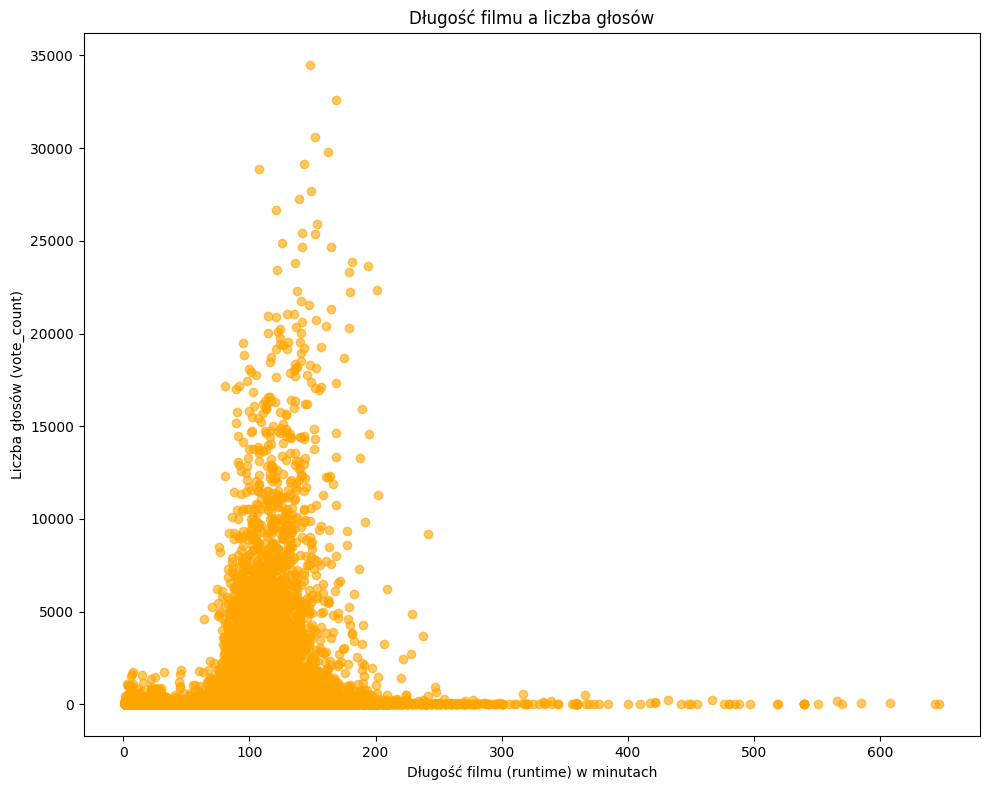

In [65]:
# Dlugosc filmu a jego liczba glosow

df_cleaned = df[df['runtime'] > 0]
df_cleaned = df_cleaned[df_cleaned['runtime'] <= 650]

plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['runtime'], df_cleaned['vote_count'], alpha=0.6, color='orange')
plt.title('Długość filmu a liczba głosów')
plt.xlabel('Długość filmu (runtime) w minutach')
plt.ylabel('Liczba głosów (vote_count)')
plt.tight_layout()
plt.show()

In [66]:
df = pd.read_csv("Movies_final.csv") # Odswiezamy dataset

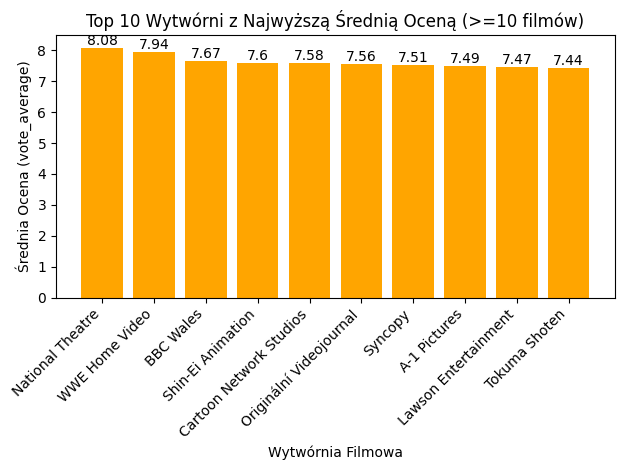

In [67]:
# Top10 wytworni wzgledem sredniej oceny ich filmow

def parse_production(companies_str):
    try:
        return [company.strip() for company in companies_str.split(',')]
    except:
        return []

df['prod_companies_list'] = df['production_companies'].apply(parse_production)
df_exploded = df.explode('prod_companies_list')
df_exploded = df_exploded.dropna(subset=['prod_companies_list'])

# Grupujemy do zliczenia sredniej oceny
grouped = df_exploded.groupby('prod_companies_list').agg(
    avg_vote=('vote_average', 'mean'),
    film_count=('prod_companies_list', 'count')
).reset_index()

grouped_filtered = grouped[grouped['film_count'] >= 10]
top_10 = grouped_filtered.nlargest(10, 'avg_vote')

bars = plt.bar(top_10['prod_companies_list'], top_10['avg_vote'], color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Wytwórni z Najwyższą Średnią Oceną (>=10 filmów)')
plt.xlabel('Wytwórnia Filmowa')
plt.ylabel('Średnia Ocena (vote_average)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

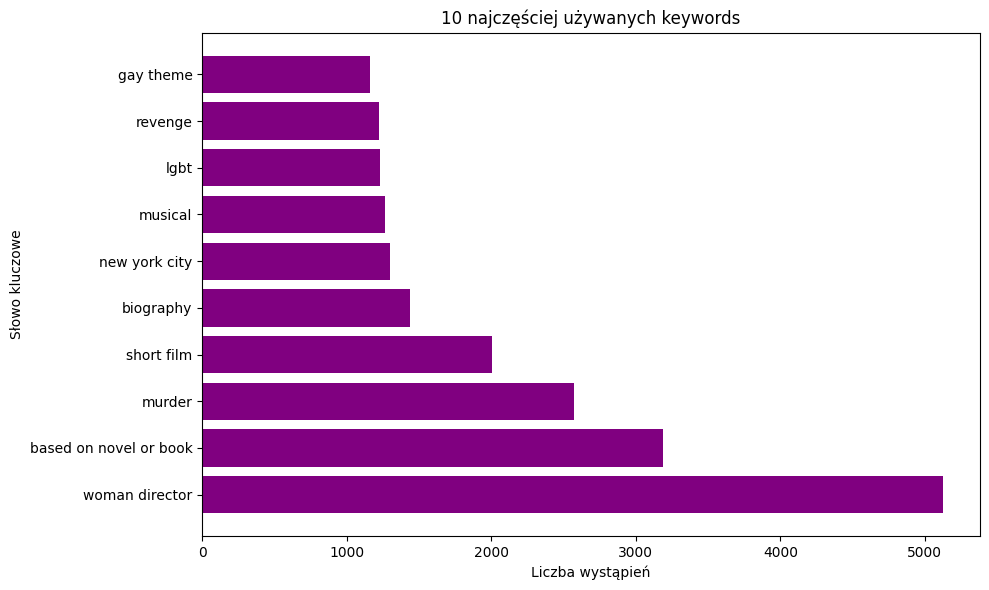

                      keyword  count
27431          woman director   5125
2061   based on novel or book   3188
16504                  murder   2572
22502              short film   2008
2488                biography   1435
17096           new york city   1302
16606                 musical   1267
14169                    lgbt   1229
20771                 revenge   1223
10195               gay theme   1158


In [68]:
# Analiza keyword i Top10 najczesciej uzywanych (zliczenie)

df['keywords'] = df['keywords'].astype(str)
df = df[df['keywords'] != 'nan']

df['keywords_list'] = df['keywords'].apply(lambda x: x.split(','))
all_keywords = [keyword.strip() for sublist in df['keywords_list'] for keyword in sublist]

keywords_df = pd.DataFrame(all_keywords, columns=['keyword'])
keyword_counts = keywords_df.groupby('keyword').size().reset_index(name='count')
top_keywords = keyword_counts.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_keywords['keyword'], top_keywords['count'], color='purple')
plt.xlabel("Liczba wystąpień")
plt.ylabel("Słowo kluczowe")
plt.title("10 najczęściej używanych keywords")
plt.tight_layout()

plt.show()
print(top_keywords)